## Python Variable Scopes

- Python’s scopes—the places where variables are defined and looked up.
- scopes help prevent name clashes across your program’s code: names defined in one program unit don’t interfere with names in another.


#### namespace
- When you use a name in a program, Python creates, changes, or looks up the name in what is known as a namespace
  - a place where names live
- When we talk about the search for a name’s value in relation to code, the term scope refers to a namespace: 
  - that is, the location of a name’s assignment in your source code determines the scope of the name’s visibility to your code.

- by default, all names assigned inside a function are associated with that function’s namespace, and no other. This rule means that:
   - Names assigned inside a def can only be seen by the code within that def. You cannot even refer to such names from outside the function.
   - Names assigned inside a def do not clash with variables outside the def, even if the same names are used elsewhere.
     - A name X assigned outside a given def (i.e., in a different def or at the top level of a module file) is a completely different variable from a name X assigned inside that def.

#### In all cases, the scope of a variable (where it can be used) is always determined by where it is assigned in your source code and has nothing to do with which functions call which.

### LEGB Rule

#### Python’s name-resolution scheme is sometimes called the LEGB rule, after the scope names:

 - When you use an unqualified name inside a function, Python searches up to four scopes—the local (L) scope, then the local scopes of any enclosing (E) defs and lambdas, then the global (G) scope, and then the built-in (B) scope—and stops at the first place the name is found. If the name is not found during this search, Python reports an error.
 - When you assign a name in a function (instead of just referring to it in an expression), Python always creates or changes the name in the local scope, unless it’s declared to be global or nonlocal in that function.
 - When you assign a name outside any function (i.e., at the top level of a module file, or at the interactive prompt), the local scope is the same as the global scope— the module’s namespace.

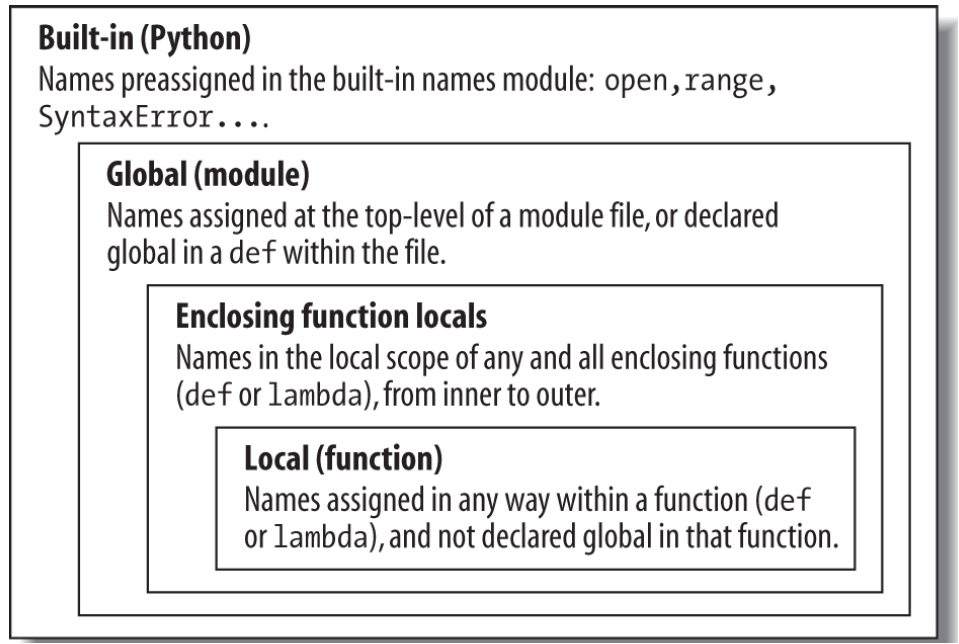

### Let's understand variable scopes through examples

## Local Scope

-  variables defined in function can be acessed only inside a function 
-  they are not available outsode the function 

In [ ]:
# Let's define  a function to print a variable

def local_scope():
    local_variable='I am acessible only inside a function'
    print(local_variable)

In [ ]:
# let's now call the function local_scope
local_scope()

In [ ]:
# Let's now try to acess the local_variable we defined in function local_scope
local_variable

- the local_variable we defined inside the local_scope function is availbe only inside the function and not outside of it this is called local scope of variable

### Enclosing Scope

- we can acess the variable defined in a function inside a enclosed function 
- but not outsude the function this is enclosed scope

In [ ]:
# Let's define nested functions

def enclosing_scope():
    enclosing_variable='I can be acessed only by enclosing functions'
    def inner_scope():
        print(enclosing_variable)
    inner_scope()

In [ ]:
enclosing_scope()

In [ ]:
# This variable cannot be accesed outside
enclosing_variable

### Global Scope

- variable defined at the begining of a module or outside all functions
- is accessbile by all functions

In [ ]:
# Let's first define a variable a
global_variable='I am acessible by all functions'

# Let's deine a function which prints our variable

def global_scope():
    print(global_variable)
    
id(global_variable)

In [ ]:
# Let's now call the function global_scope
global_scope()

### What happen's if i define a variable names global_variable inside a function

In [ ]:
# Let's modifiy our function a bit and rename it to print_var1

def global_scope1():
    global_variable='I am inside function global_scope1\nI am different from earlier global variable '
    print(global_variable)
    print(id(global_variable))

In [ ]:
# Let's call the global scope1
global_scope1()

- did the function global_scope1 change our previous global_variable
- to check that let's try to print the global_variable

In [ ]:
# Let's print the global_variable
global_variable

- we can see here that the global_variable insode the function and 
- global_variable outside are different


## Bulit in scope

- The built-in scope has all the names that are loaded into python variable scope when we start the interpreter. For example, we never need to import any module to access functions like print() and id().

In [ ]:
# lets see exapmle
print('I am in Built in scope')

In [ ]:
# another example
id(global_variable)

## global  keyword

- we have seen that when we define a variable inside a function of same name as global variable 
- this does not change the value of the global variable
- what if we want to change the value of global varible from inside the function
- or define a global variable from inside the function

#### we do this using global keyword

In [ ]:
# Let's define a variable

var='i am global variable'
id(var)
# we define a finction and change the var from inside thefunction

def change_global():
    
    global var       # first we declare that the var inside function is global
    
    var= 'i have been changed inside a function'
    
    print(var)

In [ ]:
# let's now call the change_global function
change_global()

In [ ]:
# now let's see if the global variable is changed from inside the function
var

### Defining a global variable inside a function

In [ ]:
# We define the flobal variable inside a function as below
# this is not usch different from the previous example

def global_define():
    
    global global_var     # first we declare the variable as global
    
    global_var='i have been defined inside a  function'
    
    print(global_var)

In [ ]:
# Let's now call the function global_define

global_define()

In [ ]:
# Let's now try to acess the variable global_var
# variables defined inside a function are not available outside
# unless we declare them as global inside the function

global_var

## nonlocal keyword

- as we changed the global variable inside the function using the global keyword
- we can use the nonloacl keyword to change a variable inside a enclosing function

In [27]:
# let's define the nested function

def outside_func():
    msg='i am inside outer function'
   
    def inside_func():
        msg='i am inside inner function'
        print(msg)
        
    inside_func()                # we call the inside_func in outsude func
    print(msg)            # we  print the msg from the outside function

In [28]:
# Let's now call the outisde_func
# here the variable msg in outside and inside functions are different

outside_func()

i am inside inner function
i am inside outer function


In [29]:
# Let's now change the msg variable in outside function using nonlocal keyword
# we modifiy the previous function as below

def outside_func():
    msg='i am defined inside outer function'
    
    def inside_func():
        nonlocal msg
        msg='i am changed inside inner function'
        print(msg)
        
    inside_func()                # we call the inside_func in outsude func
    print(msg)            # we  print the msg from the outside function
    

In [30]:
# Let's now call the outside_func 
# we will get same msg for both msg
outside_func()

i am changed inside inner function
i am changed inside inner function
